In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\shres\OneDrive\Desktop\Data Science\DataSets\Github\train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin and Embarked have null values.

How many Survived?

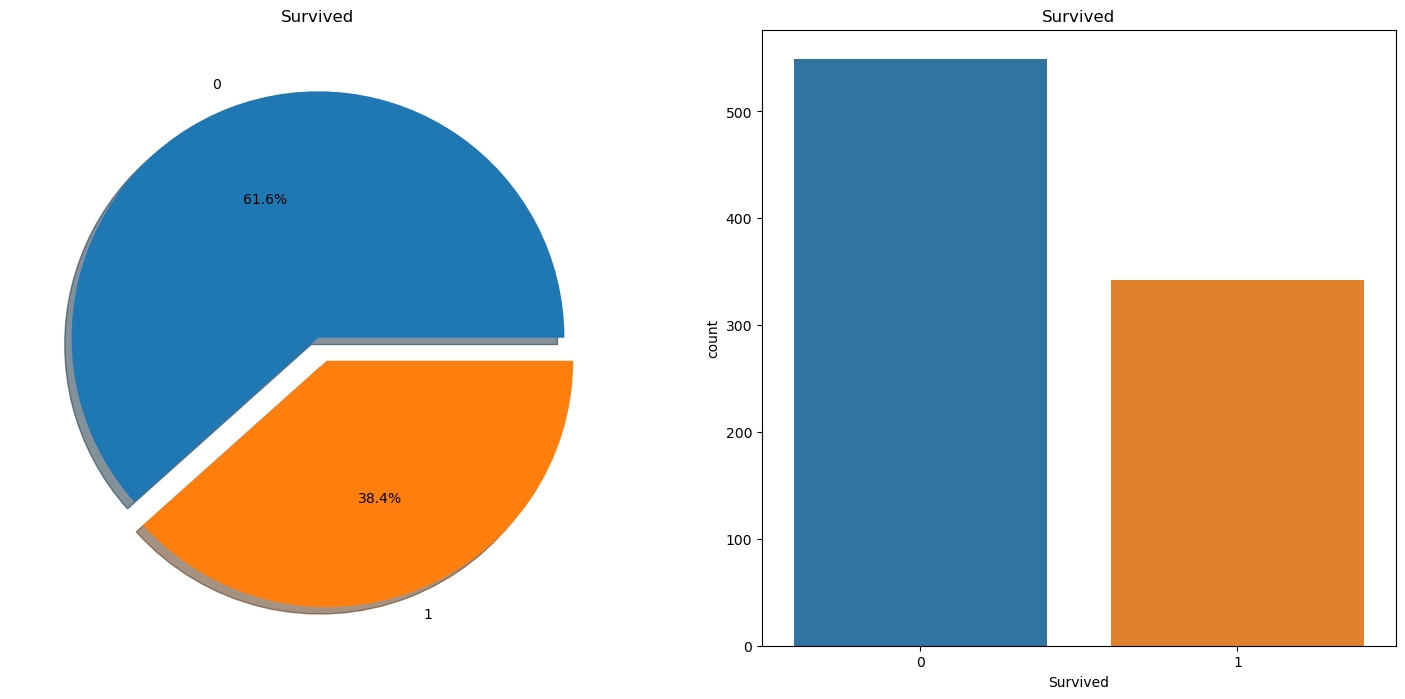

In [5]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

We can see that not many passengers survived the accident.

In [6]:
data.shape

(891, 12)

Out of 891 passengers in training set, only 350 survived i.e Only 38.4% of the total training set survived the crash.

We will dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.

Types of Features:

Categorical Features:

A categorical variable is one that has two or more categories and each value in that feature can be categorized by them.

For example, Gender is a categorical feature having two categories(male and female).

Nominal Variables: We cannot sort or give any ordering to such variables(gender).

Categorical Features in the dataset : Sex, Embarked.

Ordinal Features:

An Ordinal feature is similar to categorical values, but they can have relative ordering or sorting between the values.

For example : Height is a ordinal feature.
We can sort its values : Tall, Medium, Sort

Ordinal Features in the dataset : Pclass

Continous Feature:

A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

Continous Features in the dataset : Age

We will try to check the survival rate by using the different features of the dataset.

ANALYSING THE FEATURES

Sex  =>  Categorical Feature

In [7]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

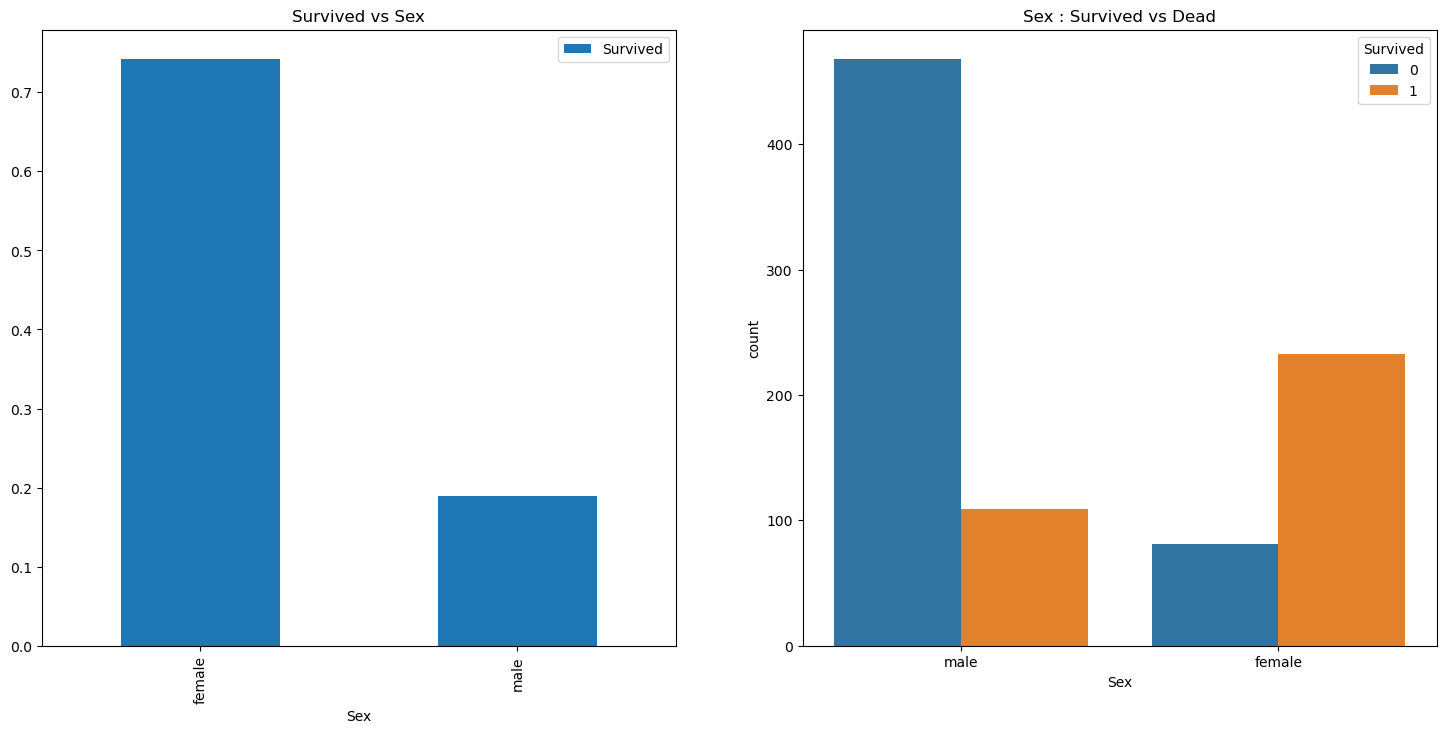

In [8]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex : Survived vs Dead')
plt.show()

The number of men present on the ship is lot more than the number of woman.

Still the number of women saved is almost twice the number of males saved.

If we observe it carefully, the survival rate of women is around 75% and the survival rate of men is around 20%.

PLACES => Ordinal Feature

In [9]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


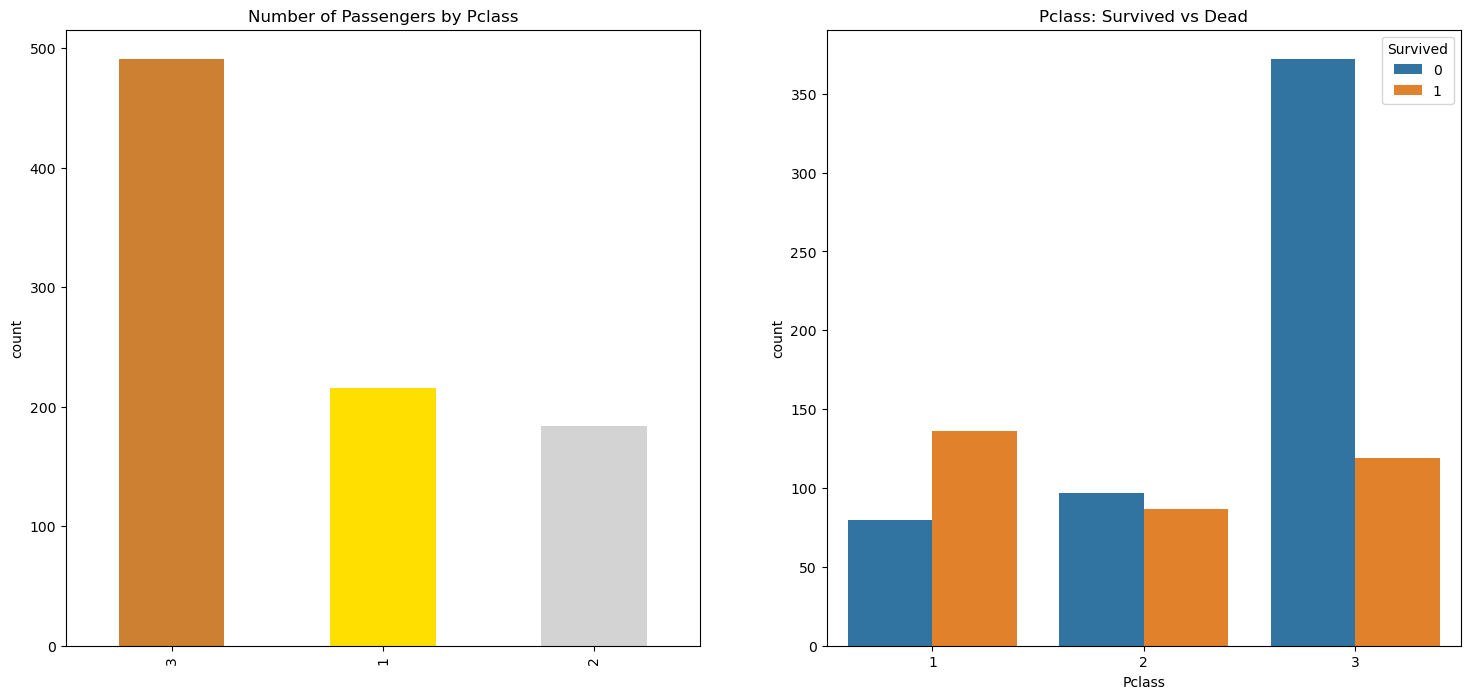

In [10]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass')
ax[0].set_ylabel('count')
sns.countplot(x='Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

We can see that passengers of Pclass 1 were givena high priority while rescue. Even though the number of Passengerss in Pclasss 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.

For Pclass 1 survival percentage is around 63% while for Pclass 2 is around 48%.

In [11]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

We can see that the survival for women from pclass 1 is about 95%, as only 3 out of 94 women from pclass 1 died.

We can observe that irrespective of Pclass, Women are given first priority while rescue. Even men from Pclass 1 have low survival rate than women.

AGE => Continous Feature

In [12]:
print('Oldest Passenger was of :', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age of passengers: ', data['Age'].mean(), 'Years')

Oldest Passenger was of : 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age of passengers:  29.69911764705882 Years


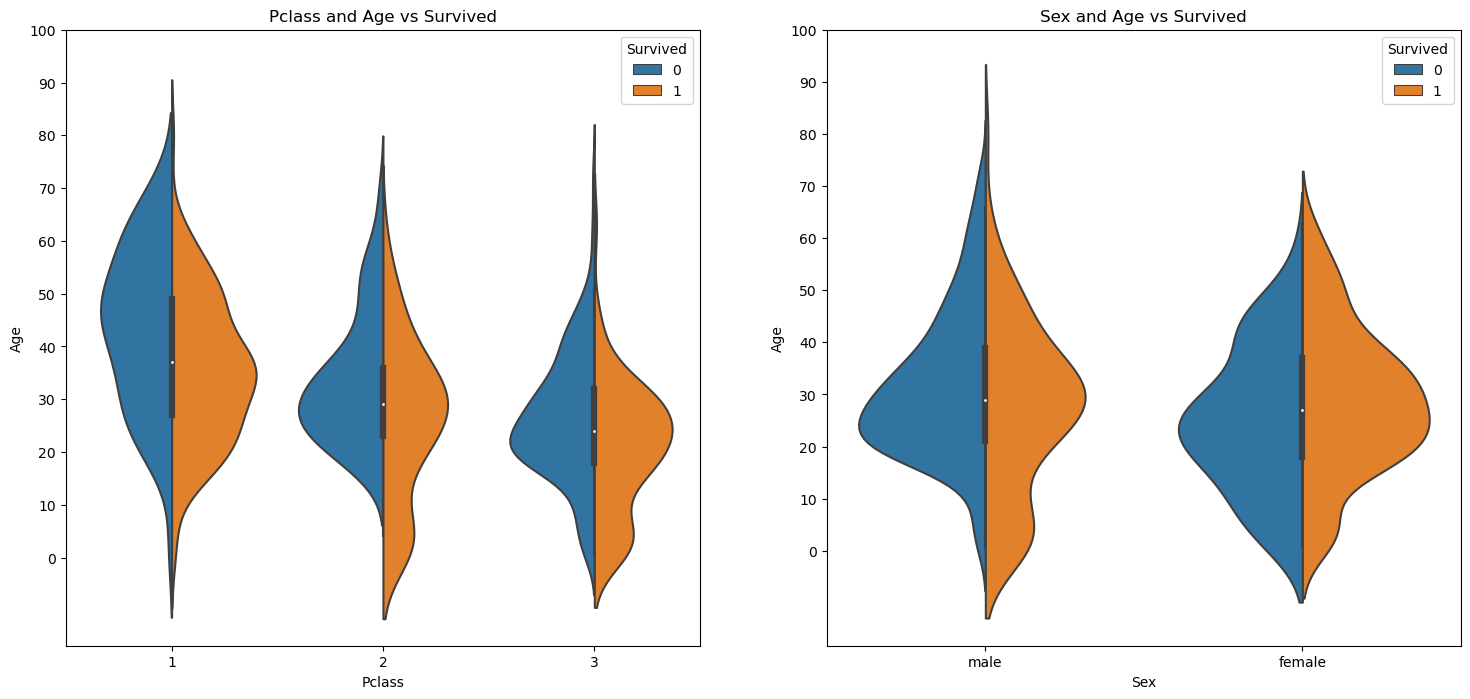

In [13]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot(x="Sex", y="Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

=> The survival rate for passengers below Age 10 looks to be good irrespective of the class

=> Survival chances for passengers aged 20-50 from Pclass 1 is high and is even better for women.

=> For males, the survival chances decreases with an increase in age.

As we have seen earlier, the Age feature has 177 null values.
We can replace these null values by assigning the mean age of the dataset.

But the problem with assigning mean is, there were many people with different ages.
We just can't assign a 4 year kid with mean age of 29 years.

Instead, we can check the Name feature.
We can see that the names have a salutation like Mr or Mrs. 
We can assign the mean values of Mr and Mrs to the respective groups.

In [14]:
data['Initial'] = 0;
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [15]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


We can observe some missplelled initials like Mlle or Mme that stand for Miss.
We can replace them with Miss and same thing for other values.

In [16]:
data['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'], ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'], inplace=True)

In [17]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

Filling Null values

In [18]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull())&(data.Initial=='Master'), 'Age'] = 5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'), 'Age'] = 22
data.loc[(data.Age.isnull())&(data.Initial=='Other'), 'Age'] = 46

In [19]:
data.Age.isnull().any()

False

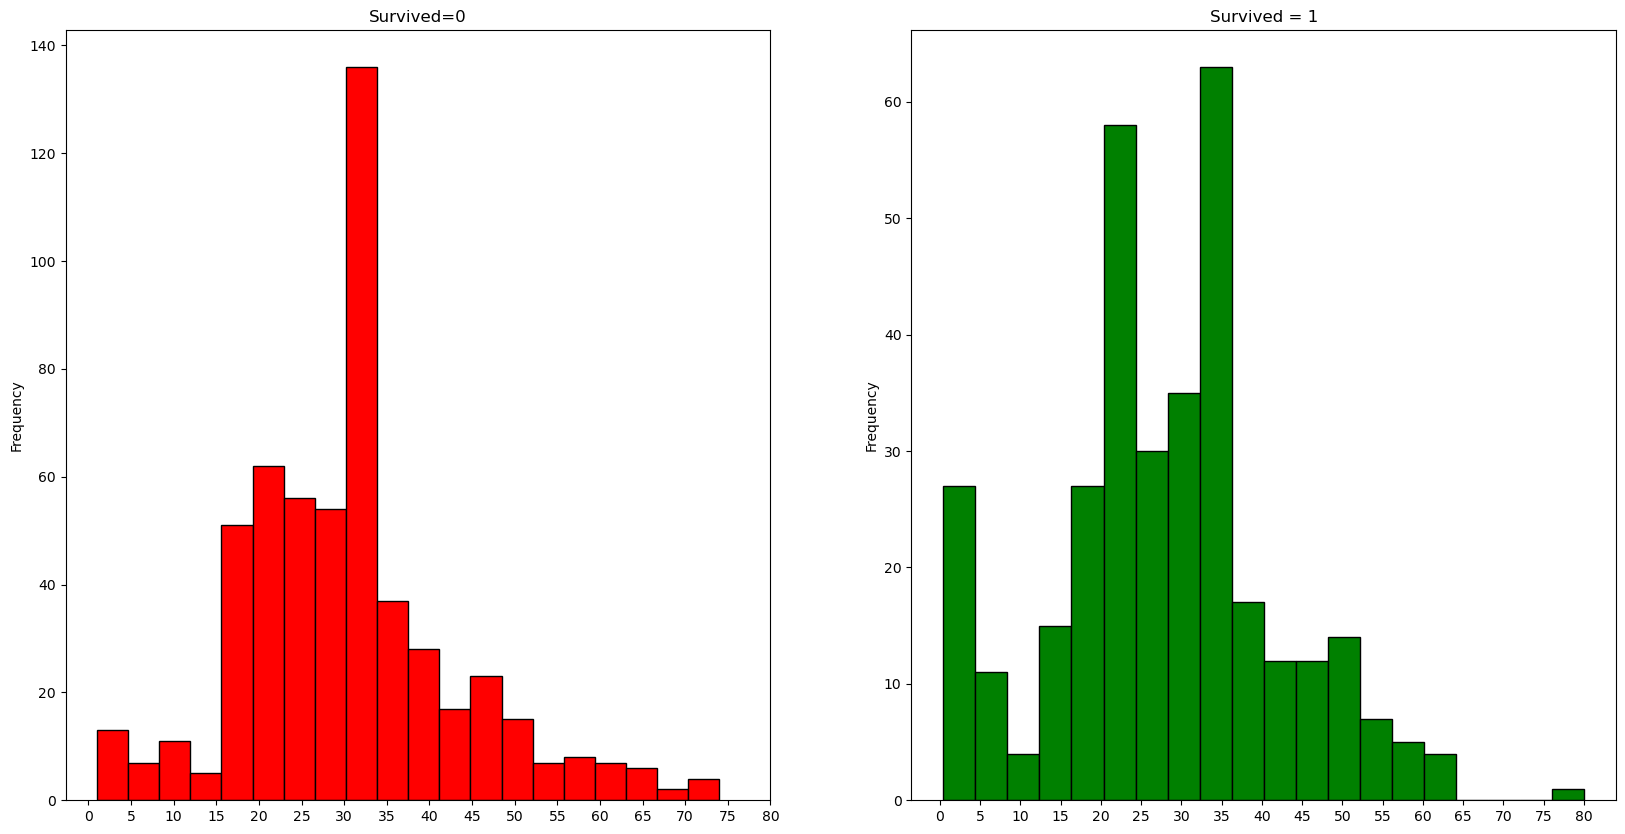

In [20]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor = 'black', color='red')
ax[0].set_title('Survived=0')
x1=list(range(0, 85, 5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived = 1')
x2=list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

The oldest passenger saved was of age 80 years.

Maximum number of deaths were in the age group of 30-40

EMBARKED => Categorical value

In [21]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived],margins=True).style.background_gradient(cmap='summer_r')

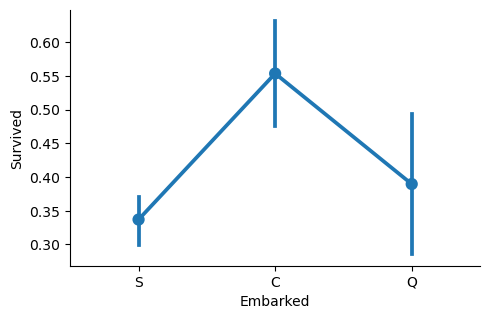

In [22]:
sns.catplot(x='Embarked', y='Survived', data=data, kind='point')
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

Chances for survival for port C is highest around 0.55 while it is lowest for S.

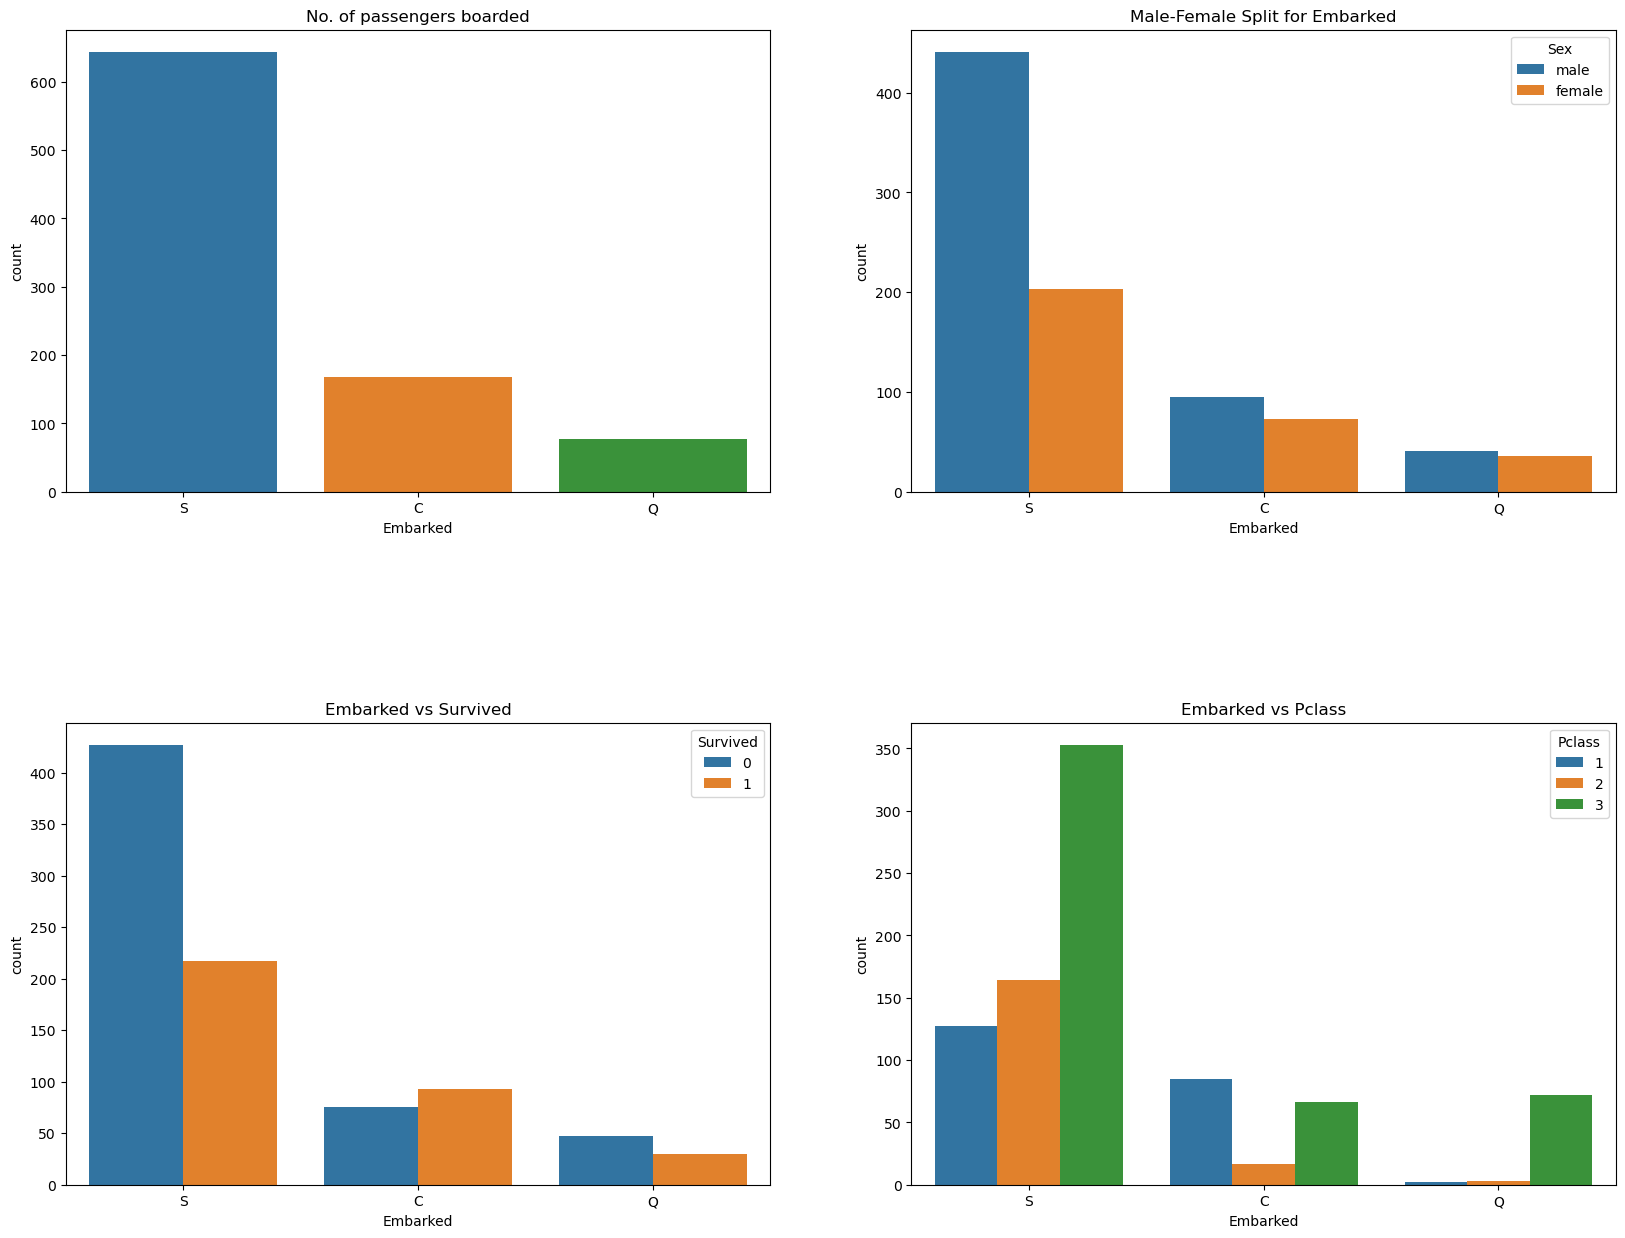

In [23]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot(x='Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No. of passengers boarded')

sns.countplot(x='Embarked', hue='Sex', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')

sns.countplot(x='Embarked', hue='Survived', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')

sns.countplot(x='Embarked', hue='Pclass', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

=> Maximum passengers boarded from S. Majority of them being from Pclass 3.

=> Good proportion of passengers from C survived. 

=> Almost 95% of passengers from port Q were from Pclass 3.

Filling Embarked null values

We can see that maximum passengers boarded from port S, so we can replace null values with S.

In [24]:
data['Embarked'].fillna('S', inplace=True)

In [25]:
data.Embarked.isnull().any()

False

SIBSP => Discrete Feature

This feature represents whether a person is alone or with his family members.
Sibling = brother, sister, stepbrother, stepsister
spouse = husband, wife

In [26]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [27]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


We can observe that if a passenger is alone with no siblings, the survival rate is around 35%.

It makes sense, because if i have a family on board, i will try to save them

But the survival for the families with 5-8 members if 0% and the reason is Pclass. The crosstab shows that person with SibSp>3 were all in Pclass 3. 

FARE => Continous Feature

In [28]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


Lowest Fare 0 means a free ride

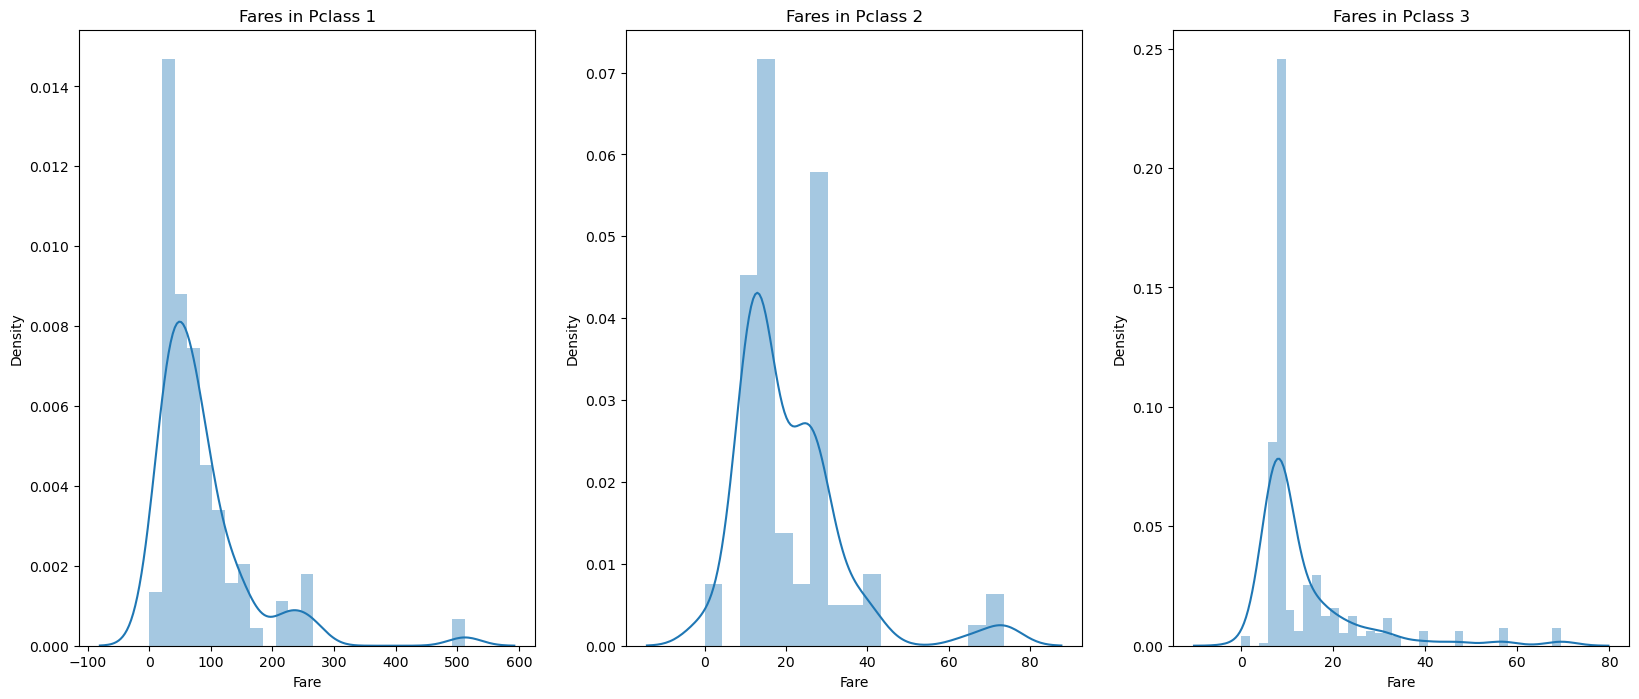

In [29]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

The distribution in the fares of passengers in Pclass 1 is large and this distribution goes on decresing as the standards reduces.

Correlation between Features:

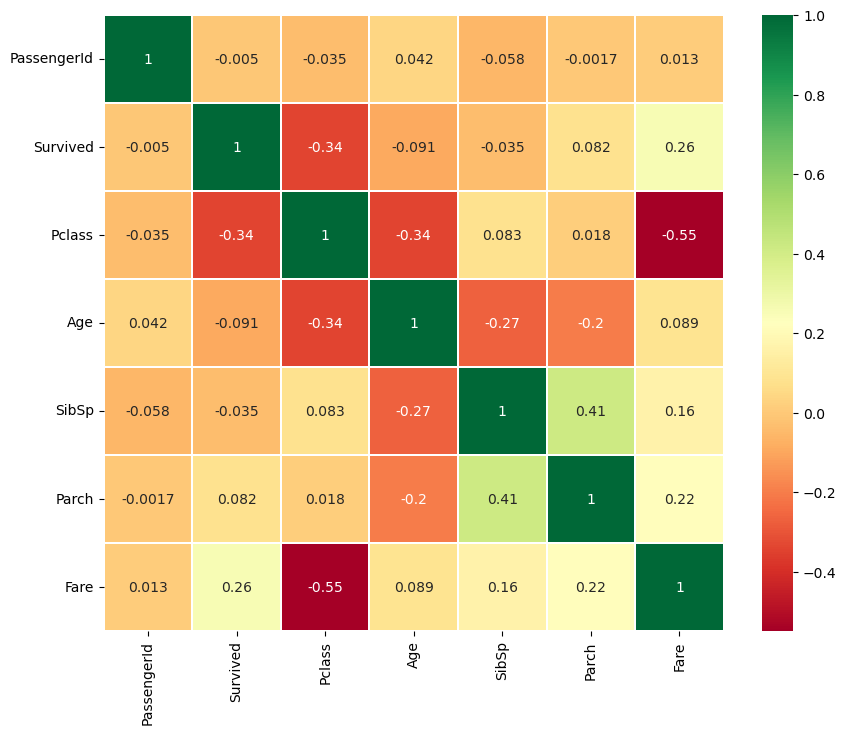

In [30]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

Positive Correlation : If an increase in feature A leads to increase in feature B, then the features A and B are correlated. 

A value 1 means perfect 

Negative Correlation : If an increase in feature A leads to decrease in feature B, then A and B are negatively vorrelated.

A value -1 means perfect negative correlation.

Observations:

Sex : The chance of survival for women is higher as compared to men.

Pclass : Being 1st class passengers gave them better chances of survival. The survival rate for Pclass 3 is very low. 

Age : Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

Embarked : The chances of survival for passengers embarked at C looks to be better even though the majority of Pclass 1 passengers got up at S. Passengers at Q were all from Pclass 3.

SibSp : Having 1-2 siblings, spouse on board or 1-3 parents shows a greater chance of probability of survival than being alone or having a large family travelling with you.